In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.stats import norm
import seaborn as sns
import math

In [54]:
path = "heart.csv"
arquivo = pd.read_csv(path)
arquivo

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [55]:
arquivo.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [56]:
arquivo.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

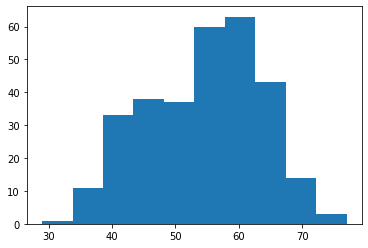

In [57]:
#idades= arquivo['age'].unique()
#qtd_idades = arquivo['age'].value_counts()
#plt.bar(idades, qtd_idades)
plt.hist(arquivo['age'])
arquivo['age'].describe()

/home/gregorio/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gregorio/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

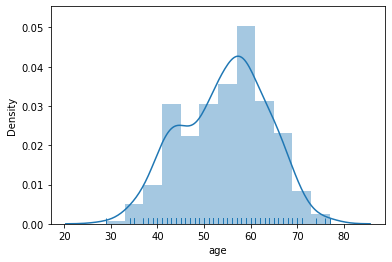

In [58]:
sns.distplot(arquivo['age'], hist=True, norm_hist=True, rug=True)

Text(0.5, 1.0, 'Feminino')

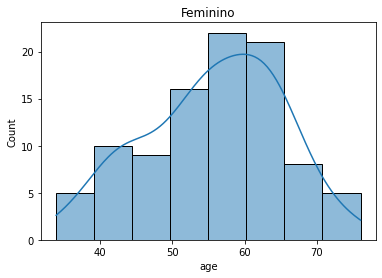

In [59]:
mulher= arquivo.query('sex ==0')
homem = arquivo.query('sex ==1')
sns.histplot(data=mulher['age'], kde="True")
plt.title("Feminino")

1    207
0     96
Name: sex, dtype: int64

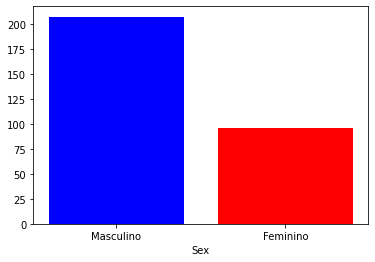

In [60]:
plt.bar([1,2], arquivo['sex'].value_counts(), color=['b', 'r'])
plt.xticks([1,2], ['Masculino', 'Feminino'])
plt.xlabel('Sex')
arquivo['sex'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

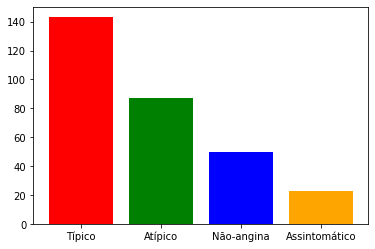

In [61]:
plt.bar([0,1,2,3], arquivo['cp'].value_counts(), color=['r', 'g', 'b', 'orange'])
plt.xticks([0,1,2,3], ['Típico', 'Atípico', 'Não-angina', 'Assintomático'])
arquivo['cp'].value_counts()

1    165
0    138
Name: target, dtype: int64

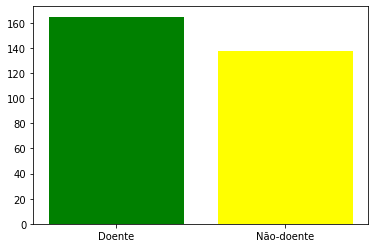

In [62]:
plt.bar([0,1], arquivo['target'].value_counts(), color=['green', 'yellow'])
plt.xticks([0,1], ['Doente', 'Não-doente'])
arquivo['target'].value_counts()

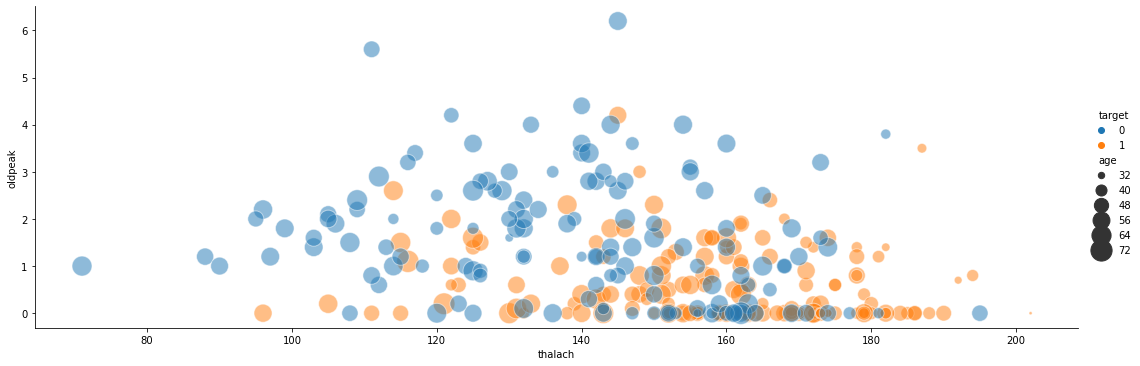

In [63]:
sns.relplot(data=arquivo, x='thalach', y='oldpeak', hue='target', size='age', sizes = (10,500), alpha=0.5, aspect=3)

# Teste 1
H0 : A amostra da pressão arterial é proveniente de uma distribuição normal

Rejeitar H0 se o p <= 0.05

/home/gregorio/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trestbps', ylabel='Density'>

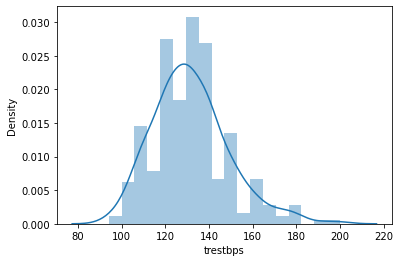

In [64]:
sns.distplot(arquivo['trestbps'])

In [65]:
stat1, pvalue1 =scipy.stats.normaltest(arquivo['trestbps'])
pvalue1<=0.05

True

In [76]:
pvalue1

6.260708761946876e-07

Portanto, hipótese nula é rejeitada

# Teste 2

H0: A amostra dos soro colesterol é proveniente de uma distribuição normal

Rejeitar H0 se o p<=0.05

In [66]:
chol_400= arquivo.query('chol <400')
chol_400

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


/home/gregorio/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

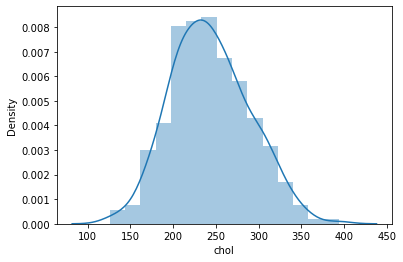

In [67]:
sns.distplot(chol_400['chol'])

In [78]:
stat2, pvalue2 =scipy.stats.normaltest(chol_400['chol'])
pvalue2<=0.05

False

In [77]:
pvalue2

0.1748931592218597

Portanto, a hipótese nula não é rejeitada

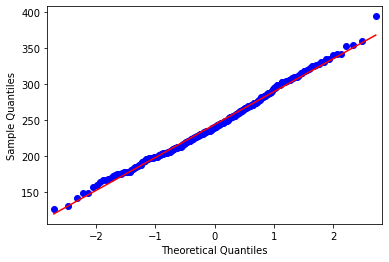

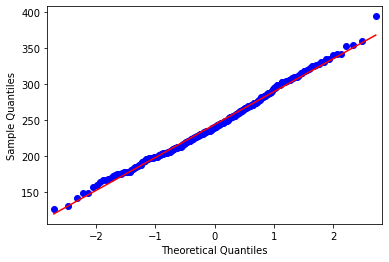

In [82]:
from statsmodels.graphics.gofplots import qqplot 
qqplot(chol_400['chol'].values, line='s')

## Teste 3
H0: a distribuição do soro colesterol é normal com u = 162.5 mg/dl

H1: a distribuição do soro colesterol é normal com u =! 162.5 mg/dl

In [69]:
qt = scipy.stats.t(df=299).ppf(0.975) #alpha=5%
qt

1.9679296690653618

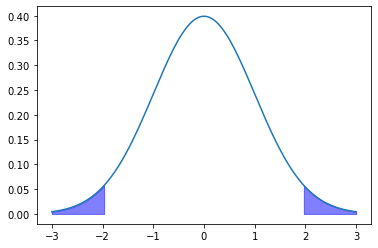

In [70]:
x = np.arange(-3, 3, 0.001)
y= norm.pdf(x,0,1)
plt.plot(x,y )
plt.fill_between(x[x>qt], y[x>qt], alpha=.5, color='blue')
plt.fill_between(x[x<-qt], y[x<-qt], alpha=.5, color='blue')

In [71]:
X = chol_400['chol'].mean()
S =chol_400['chol'].std()
T = (X - 162.5)*(math.sqrt(303))/S #estatistica t de Student
T

30.764859245475755

In [72]:
162.5 -(qt*S/(math.sqrt(303)))

157.3155869448958

In [73]:
162.5 +(qt*S/(math.sqrt(303)))

167.6844130551042

In [74]:
X

243.54849498327758

In [75]:
T>qt

True

Portanto, a hipotese nula é rejeitada.